In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1. Download the data and prepare it for analysis

In [3]:
#dowloading the data with optimyzing by changing the data types. 
visits = pd.read_csv('hypotheses_us.csv', dtype = {'Device': 'category'}, parse_dates = ['Start Ts', 'End Ts'])
orders = pd.read_csv('orders_us.csv',parse_dates = ['Buy Ts'] )
costs = pd.read_csv('visits_us.csv',parse_dates = ['dt'])

# # visits table

In [3]:
visits.head()#fist look at the data

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#loawering the case of column names for my convenience
visits.columns = visits.columns.str.lower()

In [5]:
visits.info() #cheking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [6]:
#cheking the device category unique and value counts. for some reason the value counts method didnt show me the categories grouped
visits['device'].value_counts

<bound method IndexOpsMixin.value_counts of 0           touch
1         desktop
2           touch
3         desktop
4         desktop
           ...   
359395    desktop
359396      touch
359397    desktop
359398    desktop
359399      touch
Name: device, Length: 359400, dtype: category
Categories (2, object): [desktop, touch]>

In [7]:
#Because the value counts method didnt gave me what I need, I grouped the 'device' column to count the values and see the unique categories
visits.groupby('device').count()

,end ts,source id,start ts,uid
device,,,,
desktop,262567,262567,262567,262567
touch,96833,96833,96833,96833


In [8]:
#cheking the source id column for uniqe values and counts
visits['source id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source id, dtype: int64

In [9]:
visits.duplicated().sum() #cheking for duplicates

0

# orders table

In [10]:
orders.head()#fist look at the data

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
#loawering the case of column names for my convenience
orders.columns = orders.columns.str.lower()

In [12]:
orders.info() #cheking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
orders.describe() #cheking fo outliers 

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [14]:
#looking at the largest revenue values  
orders.nlargest(20, 'revenue')

,buy ts,revenue,uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
45653,2018-04-26 20:06:00,948.44,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40643,2018-03-19 18:15:00,685.67,11149926373378902217


In [15]:
orders.duplicated().sum() #cheking for duplicates

0

after looking at the describe() table, I can see that the max of the revenue column is extra high, considering the mean and std.
so I wanted to look at the largest values at the revenue column to see how many extreme outliners there are. 
I can see that the revenue is declining slowly.So I conclude that these are real clients and not error in the data. and keeping that in mind, when working with revenues and mean. Also I can see that 75% of the revenue in the data is up to 5 in revenue, when the high values are much much higher. so the portion of these high revenue clients is pretty small.  

# costs table

In [16]:
costs.head()#fist look at the data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs.info() #cheking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [18]:
costs.describe()#cheking fo outliners

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [19]:
#looking at the largest revenue values  
costs.nlargest(20, 'costs')

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18
1005,3,2018-03-07,996.15
853,3,2017-10-06,980.52
936,3,2017-12-28,858.28
975,3,2018-02-05,845.75
942,3,2018-01-03,844.63
905,3,2017-11-27,831.73
874,3,2017-10-27,824.66
979,3,2018-02-09,822.49


Text(0, 0.5, 'costs')

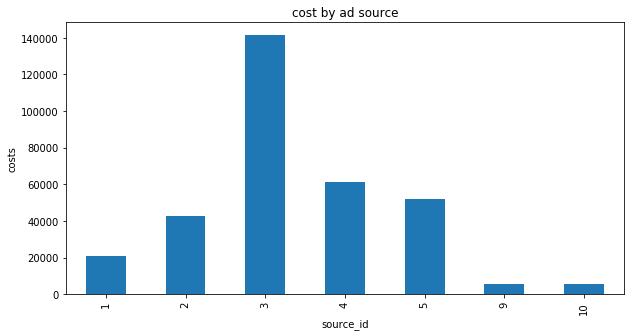

In [20]:
#ploting a bar chart
cost_by_ad = costs.groupby('source_id')['costs'].sum()
cost_by_ad.plot(x = 'source_id', figsize = (10, 5), kind = 'bar')
plt.title('cost by ad source')
plt.ylabel('costs')

In [21]:
costs.duplicated().sum() #cheking for duplicates

0

By the describe method, I could see that there are aome high values. So I cheked with the largest values and could see that most of the largest costs are from the source_id number '3'. Then I plotted a bar chart to see the difference between the source of the ad and the costs of is. and as expceted source of the ad number 3 is of the highest cost. It will be interting to chek by source id the revenues. 

# Step 2. Make reports and calculate metrics:

## 1. Product


### How many people use it every day, week, and month?

In [22]:
visits.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [23]:

visits['day'] = visits['start ts'].dt.date #ceating a 'day' column
users_per_day = visits.groupby('day').agg({'uid':'nunique'}) #grouping by day and caculating uniq id's on each day

visits['week'] = visits['start ts'].dt.week #ceating a 'week' column
users_per_week = visits.groupby('week').agg({'uid':'nunique'}) #grouping by week and caculating uniq id's on each week

visits['month'] = visits['start ts'].dt.month #ceating a 'month' column
users_per_month = visits.groupby('month').agg({'uid':'nunique'}) #grouping by month and caculating uniq id's on each month

#printing the averages of using the product by dafy, week and month
print(round(users_per_day['uid'].mean()), 'people on average use the product each day.')
print(round(users_per_week['uid'].mean()), 'people on average use the product each week.')
print(round(users_per_month['uid'].mean()), 'people on average use the product each month.')

908 people on average use the product each day.
5825 people on average use the product each week.
23228 people on average use the product each month.


### How many sessions are there per day? (One user might have more than one session.)

In [24]:
#grouping by day and calculating the average number of sessions per day
session_per_day = visits.groupby('day').agg({'start ts': 'count'}).mean()
print('There are an average of {} sessions per day.'.format(round(int(session_per_day))))


There are an average of 987 sessions per day.


### What is the length of each session?

In [25]:
#creating a new column that calculates the session duration
visits['session_duration'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits.head()

,device,end ts,source id,start ts,uid,day,week,month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,0


### How often do users come back?

In [26]:
#creating a slice of day of activity and user id
user_activity = visits[['uid', 'day']]
#calculating first log date
first_log_date = user_activity.groupby('uid')['day'].min()
first_log_date.name = 'first_log_date'
#joining the first log column 
user_activity = user_activity.join(first_log_date, on = 'uid')
user_activity.head()



,uid,day,first_log_date
0,16879256277535980062,2017-12-20,2017-12-20
1,104060357244891740,2018-02-19,2018-02-19
2,7459035603376831527,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20,2018-03-09
4,9969694820036681168,2017-12-27,2017-12-27


In [27]:
#converting the dates to month format
user_activity['day'] = pd.to_datetime(user_activity['day'], format = '%Y-%m-%d')
user_activity['first_month'] = user_activity['first_log_date'].astype('datetime64[M]')
user_activity['activity_month'] = user_activity['day'].astype('datetime64[M]')
user_activity.head()


,uid,day,first_log_date,first_month,activity_month
0,16879256277535980062,2017-12-20,2017-12-20,2017-12-01,2017-12-01
1,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-02-01
2,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20,2018-03-09,2018-03-01,2018-05-01
4,9969694820036681168,2017-12-27,2017-12-27,2017-12-01,2017-12-01


In [28]:

#creating cohorts loofetime
user_activity['cohort_lifetime'] = user_activity['activity_month'] - user_activity['first_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)
user_activity.head()

#creating cohorts df
cohorts = user_activity.groupby(['first_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_month')
#calculating the retention rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']




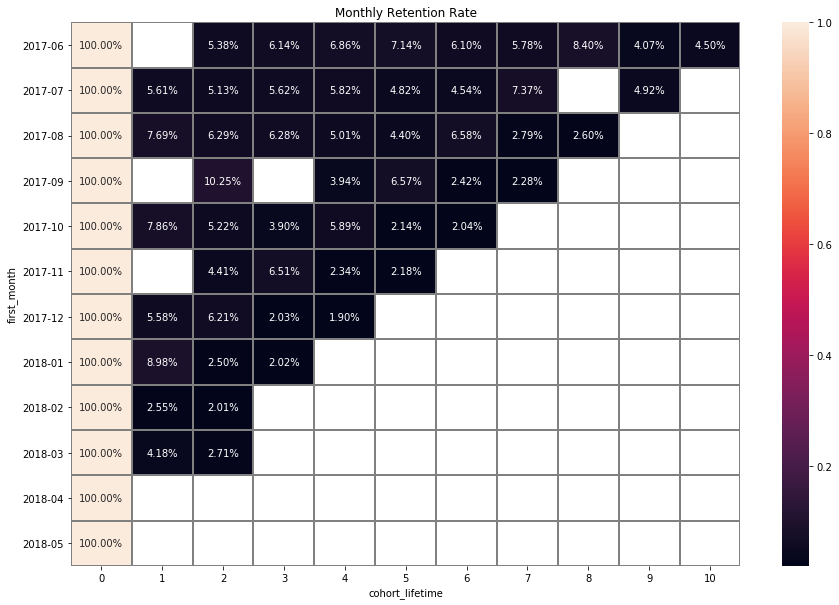

In [29]:
#creating a heatmap of retention rate
pivot_retention_month = cohorts.pivot_table(index = 'first_month', columns = 'cohort_lifetime', values = 'retention', aggfunc = 'sum')

plt.figure(figsize = (15,10))
plt.title('Monthly Retention Rate')
sns.heatmap(pivot_retention_month, annot = True, fmt = '.2%', linewidths = 1, linecolor = 'gray').set_yticklabels(pivot_retention_month.index.strftime('%Y-%m'));


### conlusion
We can see from the heatmap that the retention rate, sometimes dropes and sometimes is getting higher. Also there are months that there was no retention of users. In addition  we can see that there are months that have no retention rate. This is odd but could be explained by the event that took place in those months. Maybe there are specific type of events that are intresting for a group of users that havent took place at these months. For example it could be some famous Opera that has a spesific type of audience.  
also we can see that the retention rate is declining as we approach the winter, while there ate pretty high is the summer. There is one exception in January. This is logical as there are more event in the summer, and people tend to go uot more. The high peak in January can sepport this explanation because its the new years, so naturraly there are a lot more events in this period. 

## 2. Sales 

### When do people start buying?

In [30]:
#joining first_log_date column (that was created earlier) to visits table
visits = visits.join(first_log_date, on = 'uid')

#creating a day column for orders
orders['order_day'] = orders['buy ts'].dt.date

#creating first order date column
first_order_date = orders.groupby('uid')['order_day'].min()
first_order_date.name = 'first_order_day'
orders = orders.join(first_order_date, on = 'uid')

In [31]:
#joining the visits df with the order df on "inner", so that I would have df that contains only the uid's that had placed an order
orders_visits = orders.merge(visits, on = 'uid', how = 'inner').reset_index()
orders_visits.head()

,index,buy ts,revenue,uid,order_day,first_order_day,device,end ts,source id,start ts,day,week,month,session_duration,first_log_date
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,6,120,2017-06-01
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,6,660,2017-06-01
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,6,540,2017-06-01
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,6,1140,2017-06-01
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,6,1680,2017-06-01


In [32]:
#creating daily cohorts lifetime
orders_visits['cohort_lifetime'] = orders_visits['first_order_day'] - orders_visits['first_log_date']
orders_visits['cohort_lifetime'] = orders_visits['cohort_lifetime'] / np.timedelta64(1,'D')
orders_visits['cohort_lifetime'] = orders_visits['cohort_lifetime'].astype(int)


orders_visits.sample(5)

,index,buy ts,revenue,uid,order_day,first_order_day,device,end ts,source id,start ts,day,week,month,session_duration,first_log_date,cohort_lifetime
478356,478356,2017-09-27 12:46:00,16.67,17099157595948918718,2017-09-27,2017-09-08,touch,2017-08-19 20:29:00,1,2017-08-19 20:26:00,2017-08-19,33,8,180,2017-08-19,20
204184,204184,2017-10-15 11:34:00,2.44,13975932056717210136,2017-10-15,2017-06-05,desktop,2017-09-19 10:59:00,1,2017-09-19 10:45:00,2017-09-19,38,9,840,2017-06-05,0
519583,519583,2017-10-11 13:04:00,36.67,5915852416327196066,2017-10-11,2017-10-10,desktop,2018-05-25 18:10:00,1,2018-05-25 18:03:00,2018-05-25,21,5,420,2017-10-03,7
487973,487973,2017-11-19 00:06:00,26.89,5539673724080479777,2017-11-19,2017-09-20,desktop,2018-01-03 11:51:00,2,2018-01-03 11:49:00,2018-01-03,1,1,120,2017-09-07,13
138034,138034,2018-02-16 11:45:00,8.98,11920452646463905188,2018-02-16,2017-06-03,desktop,2017-12-17 19:59:00,1,2017-12-17 19:34:00,2017-12-17,50,12,1500,2017-06-01,2


In [33]:
#grouping data by lifetime and orders count
group_by_cohort = orders_visits.groupby('cohort_lifetime')['first_order_day'].count()
group_by_cohort

cohort_lifetime
0      283787
1       57314
2       69601
3       13633
4       96390
        ...  
355         5
356         6
357         8
358         2
363       109
Name: first_order_day, Length: 349, dtype: int64

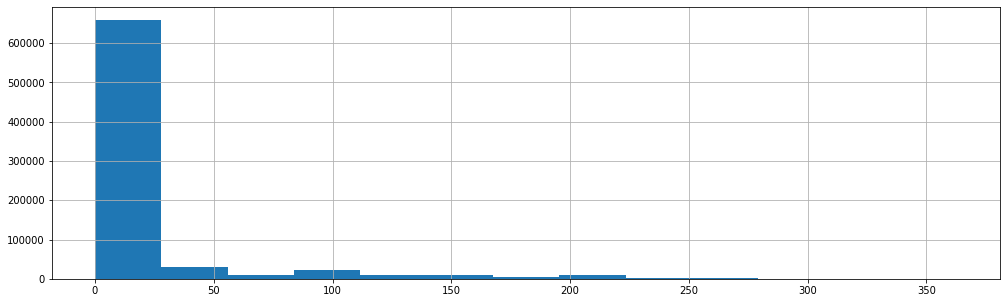

In [34]:
#creating a hist to see the lifetime distribution
orders_visits['cohort_lifetime'].hist(bins = 13, figsize = (17, 5))

Text(0, 0.5, 'orders amount')

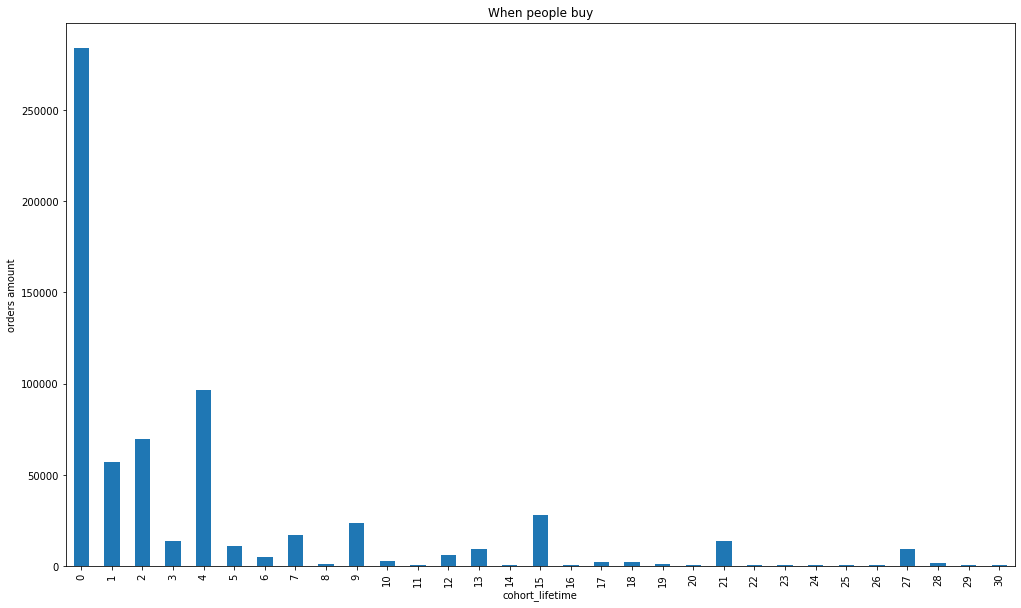

In [35]:
#choosing the first month buyers
first_month_lifetime = orders_visits.query('cohort_lifetime < 31')
first_month_count = first_month_lifetime.groupby('cohort_lifetime')['first_order_day'].count()

# making a bar chart of number of orders after the first month
first_month_count.plot(x = 'cohort_lifetime', figsize = (17, 10), kind = 'bar')
plt.title('When people buy')
plt.ylabel('orders amount')

In [36]:
#creating a week column in orders table 
orders['week'] = pd.DatetimeIndex(orders['buy ts']).weekday
#grouping data by week and counting orders
order_by_weekday = orders.groupby('week')['buy ts'].count()

Text(0, 0.5, 'orders amount')

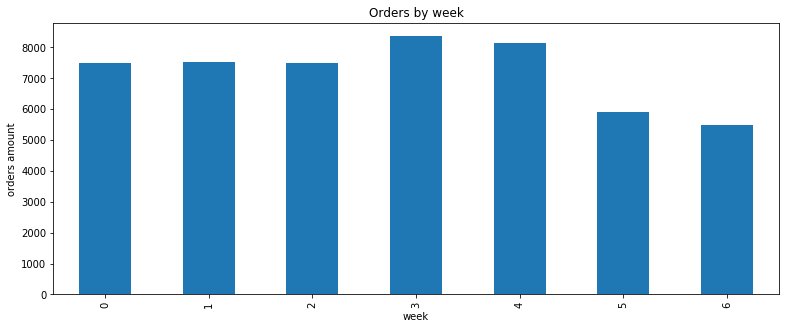

In [37]:
#creating a bar chart of orders grouped by day of week
order_by_weekday.plot(x = 'buy ts', figsize = (13, 5), kind = 'bar')
plt.title('Orders by week')
plt.ylabel('orders amount')

### conclusion
In the histogram distribution we can see, that most of the users buy a short time after the first log to the site, somthing like a month. From the bar chart that represents number of orders in the first month after logging, we can see that, a big portion of users place an order at the first day they entered the site. Within a week, most of the costumers make an order. 
In addition, we can see that there are spesific days that stands out. I assumed it was the day of the week. So i plooted a bar chart, grouped by days. We can see that thirsday and friday are the highest in orders amount, and suterday and sunday are the lowest. It seems logical, because in the weekends there are more events, hense more orders. 

### How many orders do they make during a given period of time? 

In [38]:
#creating first month and activity month in orders_visits table
orders_visits['first_month'] = orders_visits['first_log_date'].astype('datetime64[M]')
orders_visits['activity_month'] = orders_visits['day'].astype('datetime64[M]')

In [39]:
#grouping data by monthly cohort and user id
group_by_customer = orders_visits.groupby(['first_month','activity_month', 'uid']).agg({'buy ts':'count'})
group_by_customer

buy ts
first_month activity_month uid                         
2017-06-01  2017-06-01     1575281904278712           4
                           16233238570251706          1
                           28094489227360733          5
                           29085576454138824          2
                           29340056013621514          2
...                                                 ...
2018-05-01  2018-05-01     18413403606138337462       1
                           18417227789295707563       1
                           18418973552381796231       1
                           18419772037216346332       1
                           18428860277441438399       1

[56243 rows x 1 columns]

In [40]:
#creating a pivot table for number of orders by monthly cohorts
pivot_orders_period = group_by_customer.pivot_table(index = 'first_month', columns = 'activity_month', values = 'buy ts', aggfunc = 'sum')
pivot_orders_period


activity_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_month,,,,,,,,,,,,
2017-06-01,25988.0,22695.0,26029.0,43823.0,49755.0,42522.0,62580.0,44615.0,40755.0,38382.0,26577.0,24181.0
2017-07-01,NaN,6291.0,1723.0,2220.0,2304.0,2657.0,2086.0,1641.0,1143.0,1249.0,1580.0,1086.0
2017-08-01,NaN,NaN,4812.0,6266.0,4529.0,6503.0,6064.0,4045.0,3936.0,4666.0,4601.0,5553.0
2017-09-01,NaN,NaN,NaN,8448.0,4077.0,4389.0,5793.0,1850.0,2808.0,2116.0,1425.0,1310.0
2017-10-01,NaN,NaN,NaN,NaN,10818.0,4198.0,2557.0,1931.0,2004.0,1466.0,1080.0,2163.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,12151.0,13170.0,9480.0,12261.0,7612.0,2216.0,1958.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,10662.0,6429.0,3899.0,3320.0,2365.0,2557.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7660.0,7155.0,4655.0,2291.0,2474.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8826.0,5319.0,2215.0,2870.0


In [41]:
orders_visits.groupby('activity_month')['buy ts'].count()

activity_month
2017-06-01     25988
2017-07-01     28986
2017-08-01     32564
2017-09-01     60757
2017-10-01     71483
2017-11-01     72420
2017-12-01    102912
2018-01-01     77651
2018-02-01     82787
2018-03-01     75988
2018-04-01     60157
2018-05-01     70114
Name: buy ts, dtype: int64

### conclusion 
The first cohort of June standes out. They have much more orders then other cohort. Other than that I cants see any linear connection ot tendency within the cohorts. in some months there are more orders and others less. So probably there is some other reosons that effect how much people will buy at a certain month. It could be related to markenting reasons, or it could also be external reasons. Like holidays, spesific conserts or event and other scenarios. The big amount of orders in Desember can support the assumption about holidays as a fasctor. 

### What is the average purchase size? 

In [42]:
orders_visits.groupby('activity_month')['revenue'].mean()

activity_month
2017-06-01     9.747751
2017-07-01     7.725487
2017-08-01     7.015667
2017-09-01    11.355271
2017-10-01     8.351313
2017-11-01    10.130825
2017-12-01    10.609220
2018-01-01     7.841755
2018-02-01     8.780103
2018-03-01     8.970191
2018-04-01     9.136521
2018-05-01     8.230354
Name: revenue, dtype: float64

In [43]:
#creating a table of rvenue per unique users by month
data_revenue = orders_visits.groupby(['first_month', 'activity_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
data_revenue['revenue_per_user'] = data_revenue['revenue']/ data_revenue['uid']

#printing the average revenue per user
data_revenue['revenue_per_user'].mean()

255.39102381020925

In [44]:
#creating pivot table for revenue per user by monthly cohorts
revenue_per_user_pivot = data_revenue.pivot_table(index = 'first_month', columns = 'activity_month', values = 'revenue_per_user', aggfunc = 'mean')
revenue_per_user_pivot

activity_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_month,,,,,,,,,,,,
2017-06-01,86.665943,438.776046,596.016699,930.817650,903.019714,982.433462,1315.757766,1016.259342,979.567586,1060.369371,1015.523867,904.648147
2017-07-01,NaN,13.451343,46.205040,66.444000,59.792605,59.537492,54.262955,40.239444,27.461168,37.780791,111.782800,58.566993
2017-08-01,NaN,NaN,18.968832,201.539964,157.579528,294.437939,245.239095,185.774972,194.863600,384.472048,663.017541,833.962963
2017-09-01,NaN,NaN,NaN,90.363797,118.999259,274.318017,1115.710769,271.723404,664.072490,281.677102,347.141908,64.398503
2017-10-01,NaN,NaN,NaN,NaN,13.184192,41.914387,24.660279,33.877808,39.127768,27.857036,34.726256,94.329638
2017-11-01,NaN,NaN,NaN,NaN,NaN,12.221983,65.846729,89.788260,134.959460,87.866016,40.677448,38.999221
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,15.072069,92.202485,74.962471,235.877230,52.993687,50.808791
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.115393,121.852854,92.095647,87.067267,104.788636
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.936086,58.247586,47.334324,76.399801


### conclusion 
Althow its not absolute to all months, is seems that there is a tendency towerds bigger revenue per user over time. Its most clearly if we look at the first month order compare to the last, with an exception of March. 

### How much money do they bring? (LTV) 

In [45]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   buy ts           50415 non-null  datetime64[ns]
 1   revenue          50415 non-null  float64       
 2   uid              50415 non-null  uint64        
 3   order_day        50415 non-null  object        
 4   first_order_day  50415 non-null  object        
 5   week             50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2), uint64(1)
memory usage: 2.3+ MB


In [46]:
#creating first order month column
orders['buy_day'] = orders['buy ts'].dt.date
orders['order_month'] = orders['buy_day'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#merging the first_order column with orders
orders_ltv = pd.merge(orders, first_orders, on = 'uid')

In [47]:
#creating number of buyers column
n_buyers = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
n_buyers.columns = ['first_order_month', 'n_buyers']
#grouping revenue sum by months
cohorts = orders_ltv.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
#merging n_buyers with cohorts table
report = pd.merge(n_buyers, cohorts, on = 'first_order_month')

In [48]:
#creating monthly age column
report['month_age'] = (report['order_month'] - report['first_order_month'])/np.timedelta64(1,'M')
report['month_age'] = report['month_age'].round().astype('int')
report_ltv_pivot = report.pivot_table(index = 'first_order_month', columns = 'month_age', values = 'revenue', aggfunc = 'mean').round()
report_ltv_pivot = report_ltv_pivot.fillna('')
report_ltv_pivot

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,9557.0,982,885,1931,2069,1488,1923,1177,1119,1226,1156,520
2017-07-01,11558.0,645,1199,690,340,300,231,273,310,283,299,
2017-08-01,7229.0,647,628,536,677,388,289,555,400,258,,
2017-09-01,14569.0,2884,1345,10262,1034,1670,1811,628,475,,,
2017-10-01,21716.0,2325,831,682,658,522,368,501,,,,
2017-11-01,21036.0,1629,814,1326,604,220,469,,,,,
2017-12-01,20767.0,1141,4055,4669,1372,1482,,,,,,
2018-01-01,13949.0,994,1026,482,211,,,,,,,
2018-02-01,15177.0,1016,287,271,,,,,,,,


In [49]:
orders[orders['order_month'] == '2018-06-01']

,buy ts,revenue,uid,order_day,first_order_day,week,buy_day,order_month
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01,2018-06-01,4,2018-06-01,2018-06-01


### conclusion 
The lifetime value is dropping with time, but not linearly. There are months that that the same customers both more that the previous month. One of them that standes out is the september cohort that its average revenue on the 3rd month was 10,262. Its about 75% of the first purchase of this cohort. And the month before it has only 1,345 average revenue. It would be intersting to know what happened there. 
Although the  lifetime value is dropping with time it seems that there are new costumers each month, so the average revenue of new customers is sometimes growing and sometimes dropping, but not drastically. 
There is a noticeable rise of new customers at 10-12 month. 
(there was outlier in June 2018, the data should not conclude this month. I checked with the df and there was one order in the data frame. probably by mistake)

## 3. Marketing 

### How much money was spent? Overall/per source/over time 

In [50]:
#creating a month column
costs['add_date'] = costs['dt'].dt.date
costs['add_month'] = costs['add_date'].astype('datetime64[M]')

#creating a pivot table to show the costs per source over time by months
costs_by_source = costs.pivot_table(index = 'source_id', columns = 'add_month', values = 'costs', aggfunc = 'sum')
costs_by_source

add_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


### conclusion
we can see by the table, that source_id number 3 is the most expensive one. Also I can see that the months 10-12 have the highest costs by all source adds. This data can explain the peak in revenue in those months, that we saw in the previous task. 

### How much did customer acquisition from each of the sources cost? 

In [51]:

visits = visits.rename(columns = {'source id': 'source_id'})
visits.head()

,device,end ts,source_id,start ts,uid,day,week,month,session_duration,first_log_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,0,2017-12-27


In [52]:
#creating column of number of users per source from visits table
visits_by_source = visits.groupby('source_id')['uid'].nunique().reset_index()
#creating total cost column per source from visits table
costs_by_source = costs.groupby('source_id')['costs'].sum()
#joining the two tables
source_data = pd.merge(visits_by_source, costs_by_source, on = 'source_id')
source_data

,source_id,uid,costs
0,1,18999,20833.27
1,2,26245,42806.04
2,3,74756,141321.63
3,4,83525,61073.60
4,5,56974,51757.10
5,9,9264,5517.49
6,10,8067,5822.49


In [53]:
# calculating customer acquisition
source_data['cac'] = source_data['costs']/source_data['uid']
source_data

,source_id,uid,costs,cac
0,1,18999,20833.27,1.096546
1,2,26245,42806.04,1.631017
2,3,74756,141321.63,1.890439
3,4,83525,61073.60,0.731201
4,5,56974,51757.10,0.908434
5,9,9264,5517.49,0.595584
6,10,8067,5822.49,0.721766


### How worthwhile where the investments? (ROI) 

In [54]:
orders_visits = orders_visits.rename(columns = {'source id': 'source_id'})



In [55]:
#creating  a month column for adds
costs['add_date'] = costs['dt'].dt.date
costs['add_month'] = costs['add_date'].astype('datetime64[M]')


In [56]:
#joining  costs table with revenues table(report) 
report_roi = pd.merge(report,costs, left_on = 'order_month', right_on = 'add_month',how = 'outer' )
report_roi.head()

,first_order_month,n_buyers,order_month,revenue,month_age,source_id,dt,costs,add_date,add_month
0,2017-06-01,2023,2017-06-01,9557.49,0,1.0,2017-06-01,75.20,2017-06-01,2017-06-01
1,2017-06-01,2023,2017-06-01,9557.49,0,1.0,2017-06-02,62.25,2017-06-02,2017-06-01
2,2017-06-01,2023,2017-06-01,9557.49,0,1.0,2017-06-03,36.53,2017-06-03,2017-06-01
3,2017-06-01,2023,2017-06-01,9557.49,0,1.0,2017-06-04,55.00,2017-06-04,2017-06-01
4,2017-06-01,2023,2017-06-01,9557.49,0,1.0,2017-06-05,57.08,2017-06-05,2017-06-01


In [4]:
#calculating ltv, cac, and roi
report_roi['ltv'] = report_roi['revenue']/report_roi['n_buyers']
report_roi['cac'] = report_roi['costs']/report_roi['n_buyers']
report_roi['roi'] = report_roi['ltv']/report_roi['cac']
report_roi.head(5)

NameError: name 'report_roi' is not defined

In [58]:
#creating pivot table with life time by month and source_id
pivot_roi_by_source = report_roi.pivot_table(index = 'add_month', columns = 'source_id', values = 'roi', aggfunc = 'mean')
pivot_roi_by_source.fillna('')


source_id,1.0,2.0,3.0,4.0,5.0,9.0,10.0
add_month,,,,,,,
2017-06-01,300.029991,137.676814,52.217130,260.672797,122.802787,1120.716441,1240.238000
2017-07-01,250.378475,95.411150,28.547996,129.386822,74.968859,775.097924,1278.630368
2017-08-01,106.376360,54.852197,16.513748,127.663111,45.344609,422.265159,636.861474
2017-09-01,107.973157,50.793180,17.746119,55.198554,39.738929,360.181355,387.116973
2017-10-01,80.376705,37.794547,12.813256,186.308937,31.642279,313.466023,459.074959
2017-11-01,62.147646,28.476073,10.415148,103.533740,23.531772,213.835457,227.101852
2017-12-01,75.721740,34.692220,12.652370,45.664599,28.674640,267.204060,329.805517
2018-01-01,38.166926,19.235950,5.481382,40.002453,14.563692,149.709532,193.888695
2018-02-01,38.633167,18.949252,7.151727,60.086152,16.557285,153.615587,218.929675


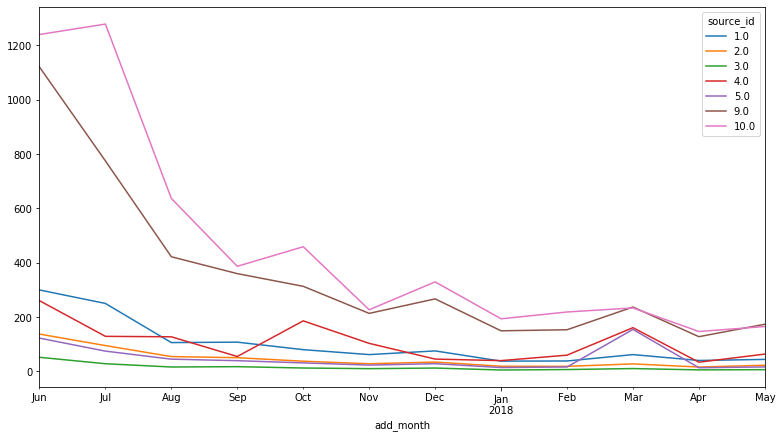

In [59]:
#ploting a graph of roi by source_id and month
pivot_roi_by_source.plot(figsize = (13,7))

# Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

 Although a lot of money have been spent on source number 3, and it seemed that there is connection between this source and revenue, especially in the 10-12 th months. When we look at the roi(return of investment) of different sources, we can see that the 3rd source is the least profitable (the green line in the graph above). 
 At 10-12 months all the sources of marketing had higher costs, but mostly surces 9 and 10 was the most profitable(pink and brown lines). 
 I would advise to the marketing experts stop the marketing for the source number 3 and invest that money in surces number 9 and 10. I would also advise to consider lowering the costs of surces number 2 and 5 (orange and purple lines), for they are also not very profitable and invest more in other sources, like 1 and 4 (red and blue lines). 